In [16]:
import numpy as np 
import pandas as pd 
from prophet import Prophet
import matplotlib.pyplot as plt

In [17]:
data=pd.read_csv('../Datas/AirPassengers.csv')
data

,Month,AirPassengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121
...,...,...
139,1960-08,606
140,1960-09,508
141,1960-10,461
142,1960-11,390


In [18]:
data.dtypes

Month            object
AirPassengers     int64
dtype: object

In [19]:
data['Month']=pd.DatetimeIndex(data['Month'])
data.head()

,Month,AirPassengers
0,1949-01-01,112
1,1949-02-01,118
2,1949-03-01,132
3,1949-04-01,129
4,1949-05-01,121


In [20]:
data.dtypes

Month            datetime64[ns]
AirPassengers             int64
dtype: object

<AxesSubplot: xlabel='Month'>

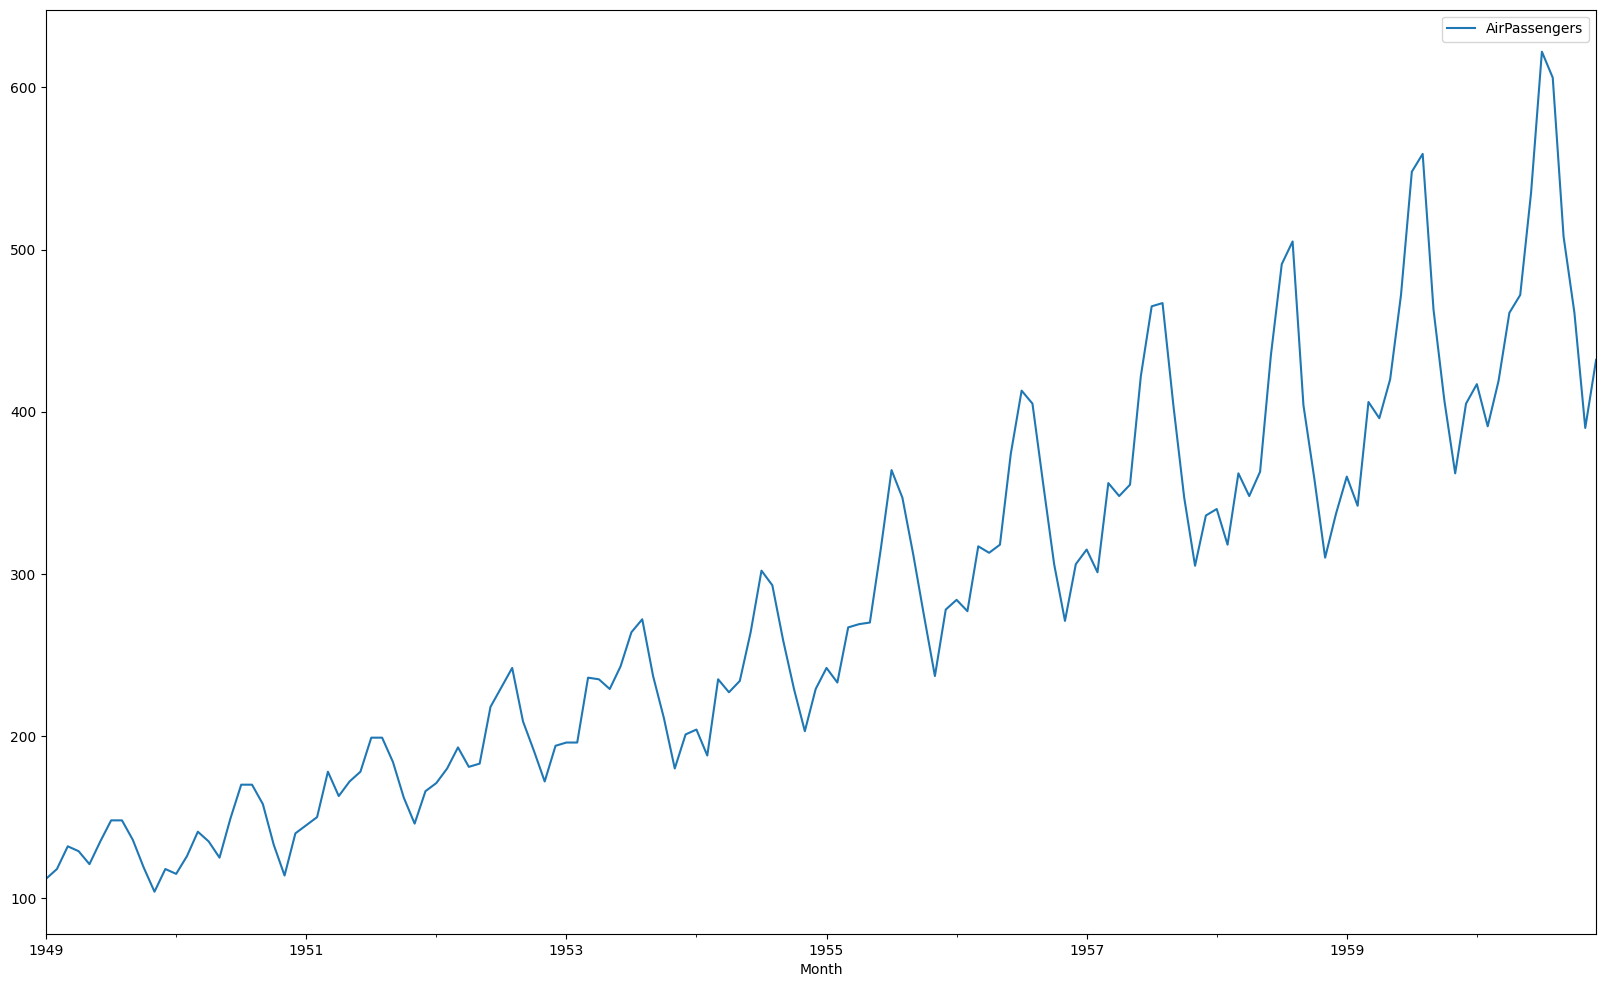

In [21]:
data.set_index('Month').plot(figsize=(20,12))

In [22]:
p=Prophet()

In [24]:
data=data.rename(columns={
    'Month':'ds',
    'AirPassengers':'y'
})
data.head()

,ds,y
0,1949-01-01,112
1,1949-02-01,118
2,1949-03-01,132
3,1949-04-01,129
4,1949-05-01,121


In [26]:
p.fit(data)

12:38:47 - cmdstanpy - INFO - Chain [1] start processing
12:38:47 - cmdstanpy - INFO - Chain [1] done processing


In [28]:
future=p.make_future_dataframe(periods=36,freq='MS')
future.tail()

,ds
175,1963-08-01
176,1963-09-01
177,1963-10-01
178,1963-11-01
179,1963-12-01


In [29]:
future

,ds
0,1949-01-01
1,1949-02-01
2,1949-03-01
3,1949-04-01
4,1949-05-01
...,...
175,1963-08-01
176,1963-09-01
177,1963-10-01
178,1963-11-01


In [30]:
forcast=p.predict(future)

In [31]:
forcast

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,1949-01-01,107.253948,57.651907,113.702755,107.253948,107.253948,-21.389753,-21.389753,-21.389753,-21.389753,-21.389753,-21.389753,0.0,0.0,0.0,85.864195
1,1949-02-01,109.404281,51.718907,109.524405,109.404281,109.404281,-30.067255,-30.067255,-30.067255,-30.067255,-30.067255,-30.067255,0.0,0.0,0.0,79.337026
2,1949-03-01,111.346517,81.777290,140.802156,111.346517,111.346517,-0.439217,-0.439217,-0.439217,-0.439217,-0.439217,-0.439217,0.0,0.0,0.0,110.907300
3,1949-04-01,113.496850,79.847332,137.119944,113.496850,113.496850,-4.957559,-4.957559,-4.957559,-4.957559,-4.957559,-4.957559,0.0,0.0,0.0,108.539291
4,1949-05-01,115.577817,83.850153,139.714990,115.577817,115.577817,-3.683712,-3.683712,-3.683712,-3.683712,-3.683712,-3.683712,0.0,0.0,0.0,111.894105
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
175,1963-08-01,582.573760,621.597892,680.532268,579.672276,585.134657,67.607972,67.607972,67.607972,67.607972,67.607972,67.607972,0.0,0.0,0.0,650.181732
176,1963-09-01,585.698049,572.713917,632.583580,582.689288,588.386288,17.199471,17.199471,17.199471,17.199471,17.199471,17.199471,0.0,0.0,0.0,602.897520
177,1963-10-01,588.721554,537.966214,596.080824,585.582454,591.557862,-22.048976,-22.048976,-22.048976,-22.048976,-22.048976,-22.048976,0.0,0.0,0.0,566.672579
178,1963-11-01,591.845844,506.877377,563.496883,588.564109,594.804026,-57.008999,-57.008999,-57.008999,-57.008999,-57.008999,-57.008999,0.0,0.0,0.0,534.836844


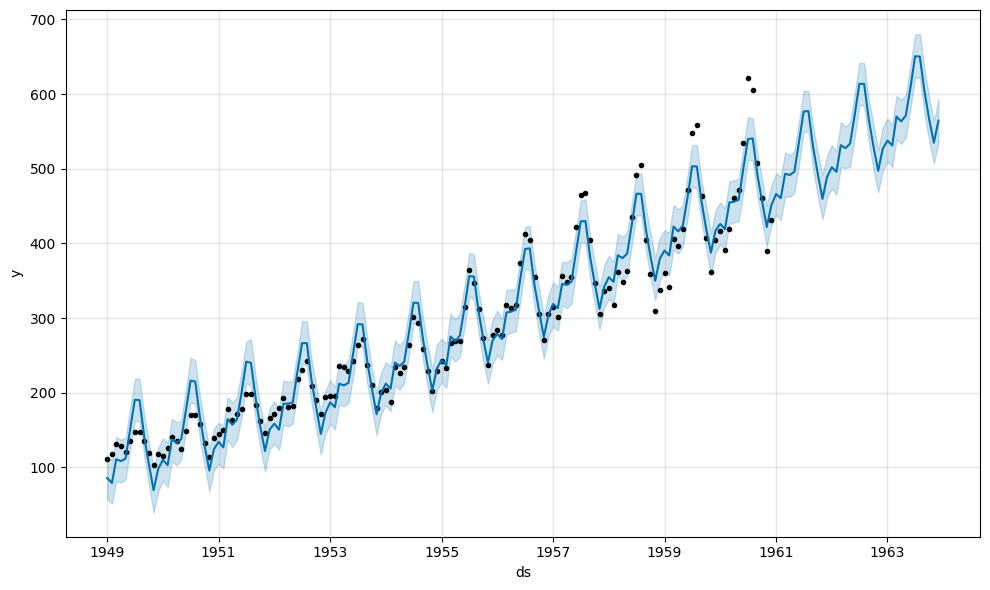

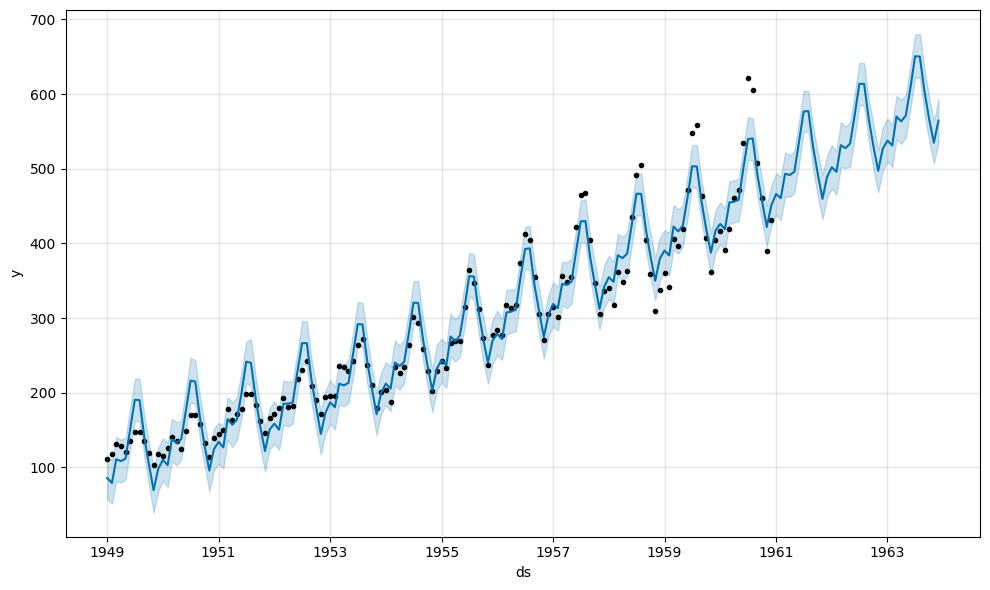

In [32]:
p.plot(forcast,uncertainty=True)